In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import numpy as np 
# import pandas as pd 
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [3]:
IMAGE_SIZE=32
CHANNELS=3

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0].name}")
    try:
        for gpu in gpus:
            # Allow TensorFlow to grow GPU memory as needed
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("🚀 GPU memory growth enabled")
    except RuntimeError as e:
        print(e)
else:
    print("⚠️ No GPU detected. Running on CPU.")

✅ GPU detected: /physical_device:GPU:0
🚀 GPU memory growth enabled


In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 18345 images belonging to 10 classes.


In [6]:
train_generator.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [8]:
for image_batch, label_batch in train_generator:
    print(label_batch)
    print(image_batch[0])
    break

[8. 8. 3. 1. 5. 6. 4. 9. 2. 1. 7. 3. 5. 1. 1. 0. 0. 1. 9. 4. 3. 0. 6. 7.
 0. 8. 0. 9. 3. 0. 5. 2.]
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9999688  0.9999688  0.9999688 ]
  [0.9999999  0.9999996  0.99999976]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         0.97831196 1.        ]
  [0.9983858  0.97299016 0.9971569 ]
  [0.9727797  0.8920963  0.9581351 ]
  ...
  [1.         0.9810656  1.        ]
  [0.99981755 0.9881024  0.99984354]
  [0.9743605  

In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 4585 images belonging to 10 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 50 images belonging to 10 classes.


In [18]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    
    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Conv2D(32, kernel_size = (5,5), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),
    layers.Conv2D(32,  kernel_size = (3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),
    layers.Conv2D(32,  kernel_size = (3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    
    layers.Dropout(0.33),
    layers.BatchNormalization(),
    layers.Dense(n_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 32, 32, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                      

In [20]:
#### Early stopping for preventing Overfitting
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    # start_from_epoch=0,
)

In [21]:
model_history=model.fit(train_generator,
                        validation_data=validation_generator,batch_size=32,
                        epochs=150,callbacks=early_stopping)

Epoch 1/150
574/574 [==============================] - 29s 48ms/step - loss: 1.2745 - accuracy: 0.5727 - val_loss: 0.6960 - val_accuracy: 0.7788
Epoch 2/150
574/574 [==============================] - 36s 63ms/step - loss: 0.8032 - accuracy: 0.7314 - val_loss: 0.5577 - val_accuracy: 0.8140
Epoch 3/150
574/574 [==============================] - 23s 40ms/step - loss: 0.6832 - accuracy: 0.7704 - val_loss: 0.4236 - val_accuracy: 0.8648
Epoch 4/150
574/574 [==============================] - 26s 46ms/step - loss: 0.6058 - accuracy: 0.8010 - val_loss: 0.3420 - val_accuracy: 0.8838
Epoch 5/150
574/574 [==============================] - 39s 69ms/step - loss: 0.5437 - accuracy: 0.8167 - val_loss: 0.5711 - val_accuracy: 0.7993
Epoch 6/150
574/574 [==============================] - 93s 163ms/step - loss: 0.5321 - accuracy: 0.8239 - val_loss: 0.3757 - val_accuracy: 0.8715
Epoch 7/150
574/574 [==============================] - 27s 47ms/step - loss: 0.4910 - accuracy: 0.8337 - val_loss: 0.2998 - val_a

In [22]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

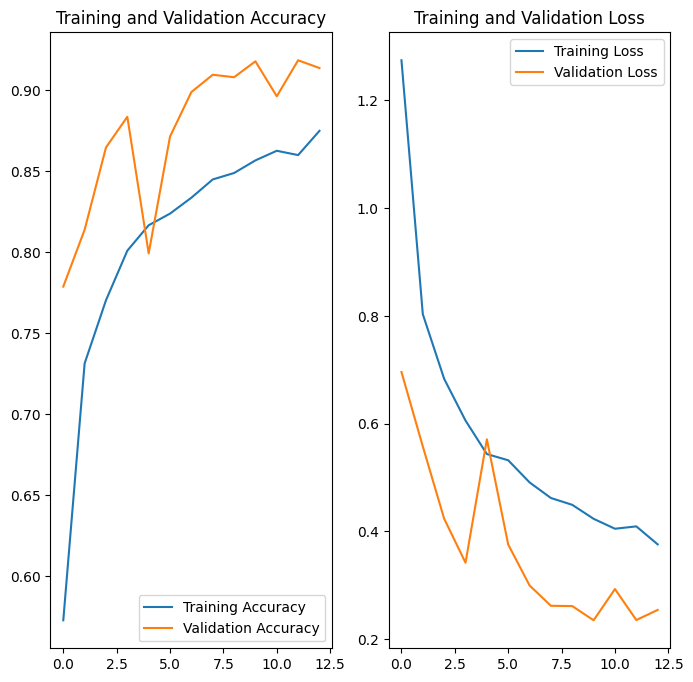

In [23]:
EPOCH=13
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
model.evaluate(test_generator)

2/2 [==============================] - 0s 307ms/step - loss: 0.1705 - accuracy: 0.9600


[0.17052124440670013, 0.9599999785423279]

Our model accuracy on the training dataset is 96%.

In [25]:
test_labels=[]
test_image=[]
for image_batch, label_batch in test_generator:
    test_labels.append(label_batch)
    test_image.append(image_batch)
    break

In [26]:
predictions = model.predict(test_image)
predicted_label = [class_names[np.argmax(element)] for element in predictions]

actual_test_label = []
for element in test_labels:
    for i in range(len(predictions)):
         actual_test_label.append(class_names[int(element[i])])    

1/1 [==============================] - 0s 154ms/step


In [27]:
import pandas as pd

In [28]:
results=pd.DataFrame({"Actual":actual_test_label,
                      "Predictions":predicted_label})
results

,Actual,Predictions
0,Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus
1,Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus
2,Tomato___healthy,Tomato___healthy
3,Tomato___Leaf_Mold,Tomato___Leaf_Mold
4,Tomato___Early_blight,Tomato___Early_blight
5,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
6,Tomato___Bacterial_spot,Tomato___Bacterial_spot
7,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
8,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
9,Tomato___Late_blight,Tomato___Late_blight


In [29]:
##Saving the model
import os
model.save("./Tomato_model_v1.h5")